In [1]:
!pip install soccerdata

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[06/07/25 02:09:16] INFO     No custom team name replacements found. You can configure these in       ]8;id=807485;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=156671;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=913349;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=534856;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#195\195]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2025)
print(fbref.__doc__)

[06/07/25 02:09:18] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=935648;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=354439;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK), Meias (MF) e Atacantes (FW)

#2- Selecionar as colunas   ('Playing Time', 'Min'),
#    ('Progression', 'PrgC'),
#    ('Progression', 'PrgP')
#    ('Aerial Duels', 'Won%'),
#    ('Aerial Duels', 'Won'),
#    ('Aerial Duels', 'Lost')
#     Fls
#   Defensive Action Tkl,TklW (%),Err,Int


In [6]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

[06/07/25 02:09:19] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=393826;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=502202;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=851732;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=181598;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-289   
                                    Bernard             BRA  FW,MF  32-271   
                                    Brahian Palacios    COL     MF  22-194   
                                    Caio Paulista       BRA     DF  27-026   
                                    Fausto Vera         ARG     MF  25-072   

                                                      born Playing Time  \
                                                                     MP   
league      season team             player                                
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998            7   
                                    Bernard           1992            9   
                                    Brahian Palacios  2002            1   
                                    Caio Paulista     1998            4   
                                    Fausto Vera       2000            7   

                                                                       \
                                                     Starts  Min  90s   
league      season team             player                              
BRA-Serie A 2526   Atlético Mineiro Alan Franco           7  585  6.5   
                                    Bernard               1  215  2.4   
                                    Brahian Palacios      0    8  0.1   
                                    Caio Paulista         3  208  2.3   
                                    Fausto Vera           5  439  4.9   

                                                     Performance      ...  \
                                                             Gls Ast  ...   
league      season team             player                            ...   
BRA-Serie A 2526   Atlético Mineiro Alan Franco                0   0  ...   
                                    Bernard                    0   0  ...   
                                    Brahian Palacios           0   0  ...   
                                    Caio Paulista              0   0  ...   
                                    Fausto Vera                1   0  ...   

                                                     Per 90 Minutes       \
                                                                Gls  Ast   
league      season team             player                                 
BRA-Serie A 2526   Atlético Mineiro Alan Franco                 0.0  0.0   
                                    Bernard                     0.0  0.0   
                                    Brahian Palacios            0.0  0.0   
                                    Caio Paulista               0.0  0.0   
                                    Fausto Vera                0.21  0.0   

                                                                               \
                                                       G+A  G-PK G+A-PK    xG   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Alan Franco        0.0   0.0    0.0  0.01   
                                    Bernard            0.0   0.0    0.0  0.02   
                                    Brahian Palacios   0.0   0.0    0.0   0.0   
                                    Caio Paulista      0.0   0.0    0.0  0.15   
                                    Fausto Vera       0.21  0.21   0.21  0.09   

                                                                         \
                                                       xAG xG+xAG  npxG   
league      season team             player                                
BRA-Serie A 2526   Atlético Mineiro Alan Franco        0.0   0.01  0.01   
                                    Bernard           0.18    0.2  

In [7]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born Playing Time         ... Per 90 Minutes                   \
                          MP Starts  ...            Gls  Ast   G+A  G-PK   
0  26-289  1998            7      7  ...            0.0  0.0   0.0   0.0   
1  32-271  1992            9      1  ...            0.0  0.0   0.0   0.0   
2  22-194  2002            1      0  ...            0.0  0.0   0.0   0.0   
3  27-026  1998            4      3  ...            0.0  0.0   0.0   0.0   
4  25-072  2000            7      5  ...           0.21  0.0  0.21  0.21   

                                            
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0    0.0  0.01   0.0   0.01  0.01     0.01  
1    0.0  0.02  0.18    0.2  0.02      0.2  
2    0.0   0.0   0.0    0.0   0.0      0.0  
3    0.0  0.15  0.04   0.19  0.15     0.19  
4   0.21  0.09  0.03   0.12  0.09     0.12  

[5 rows x 37 columns]

In [8]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

[06/07/25 02:09:20] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=454298;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=587860;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=429397;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=565422;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-289   
                                    Bernard             BRA  FW,MF  32-271   
                                    Brahian Palacios    COL     MF  22-194   
                                    Caio Paulista       BRA     DF  27-026   
                                    Fausto Vera         ARG     MF  25-072   

                                                      born  90s Performance  \
                                                                       CrdY   
league      season team             player                                    
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998  6.5           1   
                                    Bernard           1992  2.4           1   
                                    Brahian Palacios  2002  0.1           0   
                                    Caio Paulista     1998  2.3           1   
                                    Fausto Vera       2000  4.9           1   

                                                                         ...  \
                                                     CrdR 2CrdY Fls Fld  ...   
league      season team             player                               ...   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         0     0   8   3  ...   
                                    Bernard             0     0   5   3  ...   
                                    Brahian Palacios    0     0   0   0  ...   
                                    Caio Paulista       0     0   4   2  ...   
                                    Fausto Vera         0     0   6   3  ...   

                                                                               \
                                                     Crs Int TklW PKwon PKcon   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Alan Franco        2   2   10     0     0   
                                    Bernard            6   0    3     0     0   
                                    Brahian Palacios   0   0    0     0     0   
                                    Caio Paulista      6   3    4     0     0   
                                    Fausto Vera        2   4    6     0     0   

                                                              Aerial Duels  \
                                                     OG Recov          Won   
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco       0    21            8   
                                    Bernard           0    13            1   
                                    Brahian Palacios  0     1            0   
                                    Caio Paulista     0    10            3   
                                    Fausto Vera       0    19            3   

                                                                  
                                                     Lost   Won%  
league      season team             player                        
BRA-Serie A 2526   Atlético Mineiro Alan Franco         1   88.9  
                                    Bernard             0  100.0  
                                    Brahian Palacios    0   <NA>  
                                    Caio Paulista       1   75.0  
                                    Fausto Vera         5   37.5  

[5 rows x 21 columns]

In [9]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born  90s Performance  ...                                    \
                            CrdY  ... Crs Int TklW PKwon PKcon OG Recov   
0  26-289  1998  6.5           1  ...   2   2   10     0     0  0    21   
1  32-271  1992  2.4           1  ...   6   0    3     0     0  0    13   
2  22-194  2002  0.1           0  ...   0   0    0     0     0  0     1   
3  27-026  1998  2.3           1  ...   6   3    4     0     0  0    10   
4  25-072  2000  4.9           1  ...   2   4    6     0     0  0    19   

  Aerial Duels              
           Won Lost   Won%  
0            8    1   88.9  
1            1    0  100.0  
2            0    0   <NA>  
3            3    1   75.0  
4            3    5   37.5  

[5 rows x 25 columns]

In [10]:
player_season_def = fbref.read_player_season_stats(stat_type="defense")
player_season_def.head()

[06/07/25 02:09:22] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=359879;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=94487;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=572221;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=236867;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-290   
                                    Bernard             BRA  FW,MF  32-272   
                                    Brahian Palacios    COL     MF  22-195   
                                    Caio Paulista       BRA     DF  27-027   
                                    Fausto Vera         ARG     MF  25-073   

                                                      born  90s Tackles       \
                                                                    Tkl TklW   
league      season team             player                                     
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998  6.5      13   10   
                                    Bernard           1992  2.4       5    3   
                                    Brahian Palacios  2002  0.1       0    0   
                                    Caio Paulista     1998  2.3       9    4   
                                    Fausto Vera       2000  4.9       9    6   

                                                                              \
                                                     Def 3rd Mid 3rd Att 3rd   
league      season team             player                                     
BRA-Serie A 2526   Atlético Mineiro Alan Franco            5       4       4   
                                    Bernard                1       3       1   
                                    Brahian Palacios       0       0       0   
                                    Caio Paulista          4       2       3   
                                    Fausto Vera            3       6       0   

                                                      ... Challenges         \
                                                      ...        Att   Tkl%   
league      season team             player            ...                     
BRA-Serie A 2526   Atlético Mineiro Alan Franco       ...          7  100.0   
                                    Bernard           ...          5   60.0   
                                    Brahian Palacios  ...          0   <NA>   
                                    Caio Paulista     ...          7   85.7   
                                    Fausto Vera       ...         12   50.0   

                                                          Blocks         Int  \
                                                     Lost Blocks Sh Pass       
league      season team             player                                     
BRA-Serie A 2526   Atlético Mineiro Alan Franco         0      2  0    2   2   
                                    Bernard             2      2  0    2   0   
                                    Brahian Palacios    0      0  0    0   0   
                                    Caio Paulista       1      3  2    1   3   
                                    Fausto Vera         6      4  2    2   4   

                                                     Tkl+Int Clr Err  
                                                                      
league      season team             player                            
BRA-Serie A 2526   Atlético Mineiro Alan Franco           15   9   0  
                                    Bernard                5   1   0  
                                    Brahian Palacios       0   0   0  
                                    Caio Paulista         12   9   0  
                                    Fausto Vera           13   8   0  

[5 rows x 21 columns]

In [11]:
player_season_def = player_season_def.reset_index()
print(player_season_def.columns)
player_season_def.head()

MultiIndex([(    'league',        ''),
            (    'season',        ''),
            (      'team',        ''),
            (    'player',        ''),
            (    'nation',        ''),
            (       'pos',        ''),
            (       'age',        ''),
            (      'born',        ''),
            (       '90s',        ''),
            (   'Tackles',     'Tkl'),
            (   'Tackles',    'TklW'),
            (   'Tackles', 'Def 3rd'),
            (   'Tackles', 'Mid 3rd'),
            (   'Tackles', 'Att 3rd'),
            ('Challenges',     'Tkl'),
            ('Challenges',     'Att'),
            ('Challenges',    'Tkl%'),
            ('Challenges',    'Lost'),
            (    'Blocks',  'Blocks'),
            (    'Blocks',      'Sh'),
            (    'Blocks',    'Pass'),
            (       'Int',        ''),
            (   'Tkl+Int',        ''),
            (       'Clr',        ''),
            (       'Err',        '')],
           )


league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born  90s Tackles  ... Challenges             Blocks         Int  \
                         Tkl  ...        Att   Tkl% Lost Blocks Sh Pass       
0  26-290  1998  6.5      13  ...          7  100.0    0      2  0    2   2   
1  32-272  1992  2.4       5  ...          5   60.0    2      2  0    2   0   
2  22-195  2002  0.1       0  ...          0   <NA>    0      0  0    0   0   
3  27-027  1998  2.3       9  ...          7   85.7    1      3  2    1   3   
4  25-073  2000  4.9       9  ...         12   50.0    6      4  2    2   4   

  Tkl+Int Clr Err  
                   
0      15   9   0  
1       5   1   0  
2       0   0   0  
3      12   9   0  
4      13   8   0  

[5 rows x 25 columns]

In [12]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(col).strip() for col in player_season_misc.columns]
player_season_def.columns = ['_'.join(col).strip() for col in player_season_def.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)
print(player_season_def.columns)

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [13]:

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','Playing Time_Min','Progression_PrgC', 'Progression_PrgP']
]
df_misc_selected = player_season_misc[
    ['player_', 'team_', 'Aerial Duels_Won%', 'Aerial Duels_Won', 'Aerial Duels_Lost','Performance_Fls','Performance_CrdY','Performance_CrdR','Performance_2CrdY']
]
df_def_selected = player_season_def[
    ['player_', 'team_','Challenges_Tkl', 'Challenges_Att','Challenges_Tkl%','Int_', 'Err_']
]

# 4. Realizar o merge dos três DataFrames com base nas colunas 'player_' e 'team_'
df_merged_1 = pd.merge(df_std_selected, df_misc_selected, on=['player_', 'team_'], how='inner')
df_merged = pd.merge(df_merged_1, df_def_selected, on=['player_', 'team_'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

            player_             team_   pos_  Playing Time_Min  \
0       Alan Franco  Atlético Mineiro     MF               585   
1           Bernard  Atlético Mineiro  FW,MF               215   
2  Brahian Palacios  Atlético Mineiro     MF                 8   
3     Caio Paulista  Atlético Mineiro     DF               208   
4       Fausto Vera  Atlético Mineiro     MF               439   

   Progression_PrgC  Progression_PrgP  Aerial Duels_Won%  Aerial Duels_Won  \
0                 2                22               88.9                 8   
1                11                23              100.0                 1   
2                 0                 0               <NA>                 0   
3                 6                17               75.0                 3   
4                 5                22               37.5                 3   

   Aerial Duels_Lost  Performance_Fls  Performance_CrdY  Performance_CrdR  \
0                  1                8                 1  

In [14]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK), Meias (MF), Atacantes(FW)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|MF|FW', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())


          player_             team_ pos_  Playing Time_Min  Progression_PrgC  \
13  Júnior Alonso  Atlético Mineiro   DF               922                11   
15         Lyanco  Atlético Mineiro   DF               718                 8   
16       Natanael  Atlético Mineiro   DF               803                11   
28   David Duarte             Bahia   DF               708                 2   
34       Gilberto             Bahia   DF               716                14   

    Progression_PrgP  Aerial Duels_Won%  Aerial Duels_Won  Aerial Duels_Lost  \
13                58               63.2                24                 14   
15                35               65.5                19                 10   
16                28               40.0                 8                 12   
28                22               69.4                25                 11   
34                27               47.8                11                 12   

    Performance_Fls  Performance_CrdY 

In [15]:
# Selecionar as colunas desejadas para análise
Zag = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('Playing Time_Min'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Aerial Duels_Won%'),
    ('Aerial Duels_Won'),
    ('Aerial Duels_Lost'),
    ('Performance_Fls'),
    ('Performance_CrdY'),
    ('Performance_CrdR'),
    ('Performance_2CrdY'),
    ('Challenges_Tkl'),
    ('Challenges_Att'),
    ('Challenges_Tkl%'),
    ('Int_'),
    ('Err_'),
]]

# Renomear as colunas para facilitar o uso
Zag.columns = ['jogador','time','posicao', 'Minutos', 'Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(Zag.head())


# Criar a nova coluna 'Aerial Duels ' no formato "50% (10/10)"
Zag['Aerial Duels '] = (
    Zag['Aerial Duel%'].astype(str) + '% (' +
    Zag['Aerial Duel Won'].astype(str) + '/' +
    Zag['Aerial Duel Lost'].astype(str) + ')')
# Remover jogadores com todas as métricas iguais a 0
Zag = Zag[(Zag[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls','Desarmes Totais','Desarmes%','Interceptacao','Desarmes Certos',]] != 0).any(axis=1)]

# Exportar o dataframe para um arquivo CSV
Zag.to_csv('Zag_data.csv', index=False, encoding='utf-8-sig')
# Exibir as primeiras linhas para conferir
Zag.head


          jogador              time posicao  Minutos  Prgc  PrgP  \
13  Júnior Alonso  Atlético Mineiro      DF      922    11    58   
15         Lyanco  Atlético Mineiro      DF      718     8    35   
16       Natanael  Atlético Mineiro      DF      803    11    28   
28   David Duarte             Bahia      DF      708     2    22   
34       Gilberto             Bahia      DF      716    14    27   

    Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  \
13          63.2               24                14     11            2   
15          65.5               19                10     17            6   
16          40.0                8                12     10            0   
28          69.4               25                11      6            1   
34          47.8               11                12      7            2   

    Red Card  2 Yellow Card  Desarmes Certos  Desarmes Totais  Desarmes%  \
13         0              0                5               10   

<bound method NDFrame.head of             jogador              time posicao  Minutos  Prgc  PrgP  \
13    Júnior Alonso  Atlético Mineiro      DF      922    11    58   
15           Lyanco  Atlético Mineiro      DF      718     8    35   
16         Natanael  Atlético Mineiro      DF      803    11    28   
28     David Duarte             Bahia      DF      708     2    22   
34         Gilberto             Bahia      DF      716    14    27   
..              ...               ...     ...      ...   ...   ...   
509  Paulo Henrique     Vasco da Gama      DF      803    25    33   
516       Claudinho           Vitória      DF      695    26    35   
523        Jamerson           Vitória      DF      982    33    41   
529    Lucas Halter           Vitória      DF      990     6    27   
539       Zé Marcos           Vitória      DF      675     4    30   

     Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  \
13           63.2               24                14     11            2   
15           65.5               19                10     17            6   
16           40.0                8                12     10            0   
28           69.4               25                11      6            1   
34           47.8               11                12      7            2   
..            ...              ...               ...    ...          ...   
509          50.0               11                11     14            4   
516          44.4                4                 5      8            4   
523          60.0               12                 8      9            0   
529          63.6               14                 8      5            2   
539          65.2               15                 8      5            1   

     Red Card  2 Yellow Card  Desarmes Certos  Desarmes Totais  Desarmes%  \
13          0              0                5               10       50.0   
15          2              2                7               11       63.6   
16          0              0                9               17       52.9   
28          0              0                1                4       25.0   
34          0              0               13               20       65.0   
..        ...            ...              ...              ...        ...   
509         0              0               19               29       65.5   
516         0              0               10               17       58.8   
523         0              0               11               18       61.1   
529         0              0                9               13       69.2   
539         0              0                3                3      100.0   

     Interceptacao  Erros  Aerial Duels   
13              10      0  63.2% (24/14)  
15              22      3  65.5% (19/10)  
16              13      0   40.0% (8/12)  
28               7      0  69.4% (25/11)  
34               4      2  47.8% (11/12)  
..             ...    ...            ...  
509              6      1  50.0% (11/11)  
516              8      1    44.4% (4/5)  
523             12      0   60.0% (12/8)  
529              3      0   63.6% (14/8)  
539              5      0   65.2% (15/8)  

[64 rows x 19 columns]>

### **2. Criar modelos de classificação para  (ZAGUEIRO)**

In [16]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Zag[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Interceptacao','Erros','Desarmes Certos']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
Zag['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(Zag[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Desarmes%','Interceptacao','Erros','Desarmes%']])

     Prgc  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  \
13     11    58          63.2               24                14     11   
15      8    35          65.5               19                10     17   
16     11    28          40.0                8                12     10   
28      2    22          69.4               25                11      6   
34     14    27          47.8               11                12      7   
..    ...   ...           ...              ...               ...    ...   
509    25    33          50.0               11                11     14   
516    26    35          44.4                4                 5      8   
523    33    41          60.0               12                 8      9   
529     6    27          63.6               14                 8      5   
539     4    30          65.2               15                 8      5   

     Yellow Card  Red Card  2 Yellow Card  Desarmes%  Interceptacao  Erros  \
13             2     

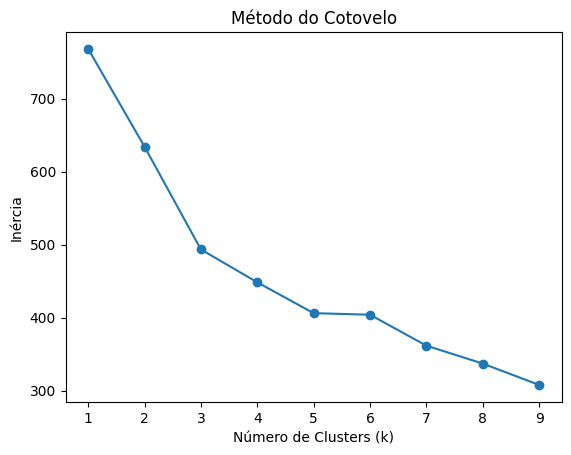

In [17]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [18]:
# Verificar se há algum NaN em X_scaled
tem_nan = np.isnan(X_scaled).any()

if tem_nan:
    print("X_scaled contém NaNs.")
else:
    print("X_scaled não contém NaNs.")

# Para ver a quantidade de NaNs por coluna:
nans_por_coluna = np.isnan(X_scaled).sum(axis=0)
print("Número de NaNs por coluna:", nans_por_coluna)

# Para ver a quantidade total de NaNs:
total_nans = np.isnan(X_scaled).sum()
print("Número total de NaNs:", total_nans)

X_scaled não contém NaNs.
Número de NaNs por coluna: [0 0 0 0 0 0 0 0 0 0 0 0]
Número total de NaNs: 0


In [19]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = Zag.groupby('Cluster').agg({col: 'mean' for col in Zag.select_dtypes(include=['number']).columns})
print(cluster_summary)

            Minutos       Prgc       PrgP  Aerial Duel%  Aerial Duel Won  \
Cluster                                                                    
0             764.0  14.866667  35.133333     35.766667         5.133333   
1        802.055556   4.777778  31.277778     64.644444        16.666667   
2             795.5        9.5       41.5         50.05             14.0   
3        914.923077   5.923077  29.076923     64.246154        25.615385   
4           832.625    18.8125       43.0       57.8375          12.3125   

         Aerial Duel Lost     Fouls  Yellow Card  Red Card  2 Yellow Card  \
Cluster                                                                     
0                8.666667  9.666667     2.466667       0.0            0.0   
1                9.277778  5.777778     1.333333       0.0            0.0   
2                    13.5      17.0          4.5       1.5            1.5   
3               14.538462      10.0     2.076923       0.0            0.0   
4    

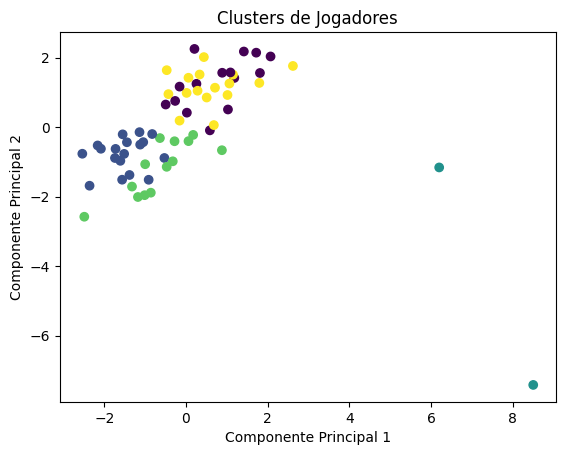

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [21]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = Zag.select_dtypes(include=np.number).columns
correlation_matrix = Zag[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                   Minutos      Prgc      PrgP  Aerial Duel%  Aerial Duel Won  \
Minutos           1.000000 -0.011326  0.317906      0.147501         0.402929   
Prgc             -0.011326  1.000000  0.414185     -0.353422        -0.448018   
PrgP              0.317906  0.414185  1.000000     -0.026698        -0.116638   
Aerial Duel%      0.147501 -0.353422 -0.026698      1.000000         0.685067   
Aerial Duel Won   0.402929 -0.448018 -0.116638      0.685067         1.000000   
Aerial Duel Lost  0.389928 -0.084782 -0.088423     -0.230118         0.416741   
Fouls             0.066725  0.421848  0.258718     -0.187968        -0.134131   
Yellow Card      -0.182190 -0.040425 -0.083213     -0.152259        -0.084416   
Red Card         -0.073315 -0.046009  0.053037     -0.004801         0.021818   
2 Yellow Card    -0.073315 -0.046009  0.053037     -0.004801         0.021818   
Desarmes Certos   0.143900  0.486621  0.200441     -0.371053        -0.282818   
Desarmes Totais   0.100675  

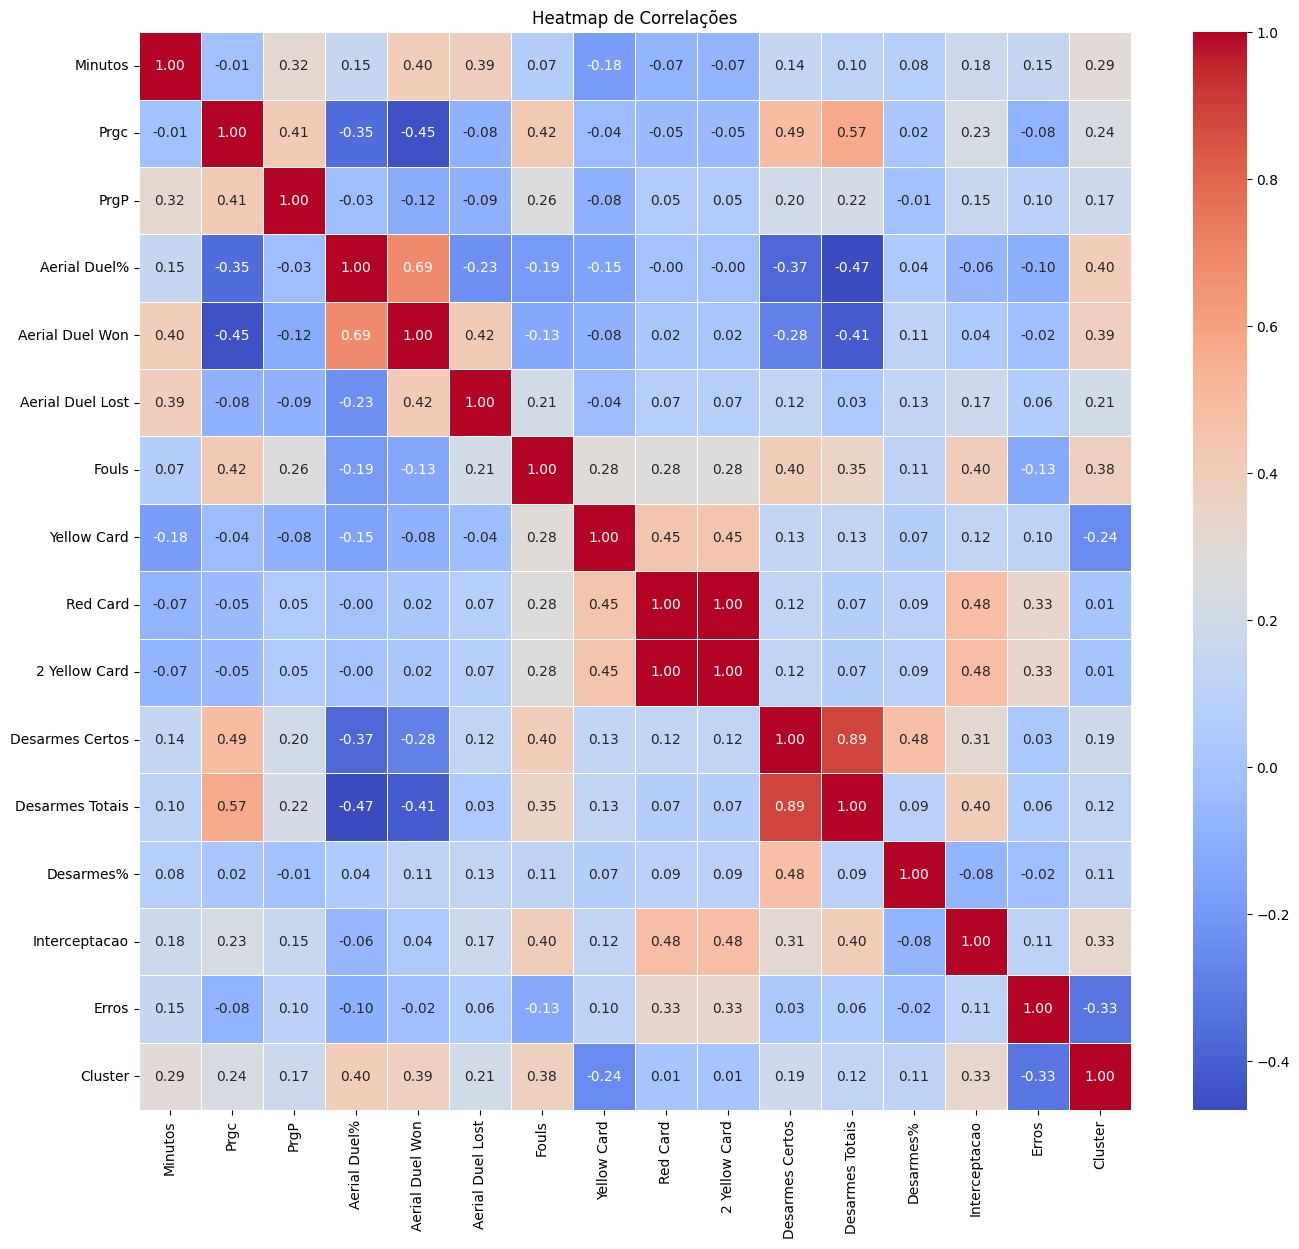

In [22]:
plt.figure(figsize=(16, 14))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

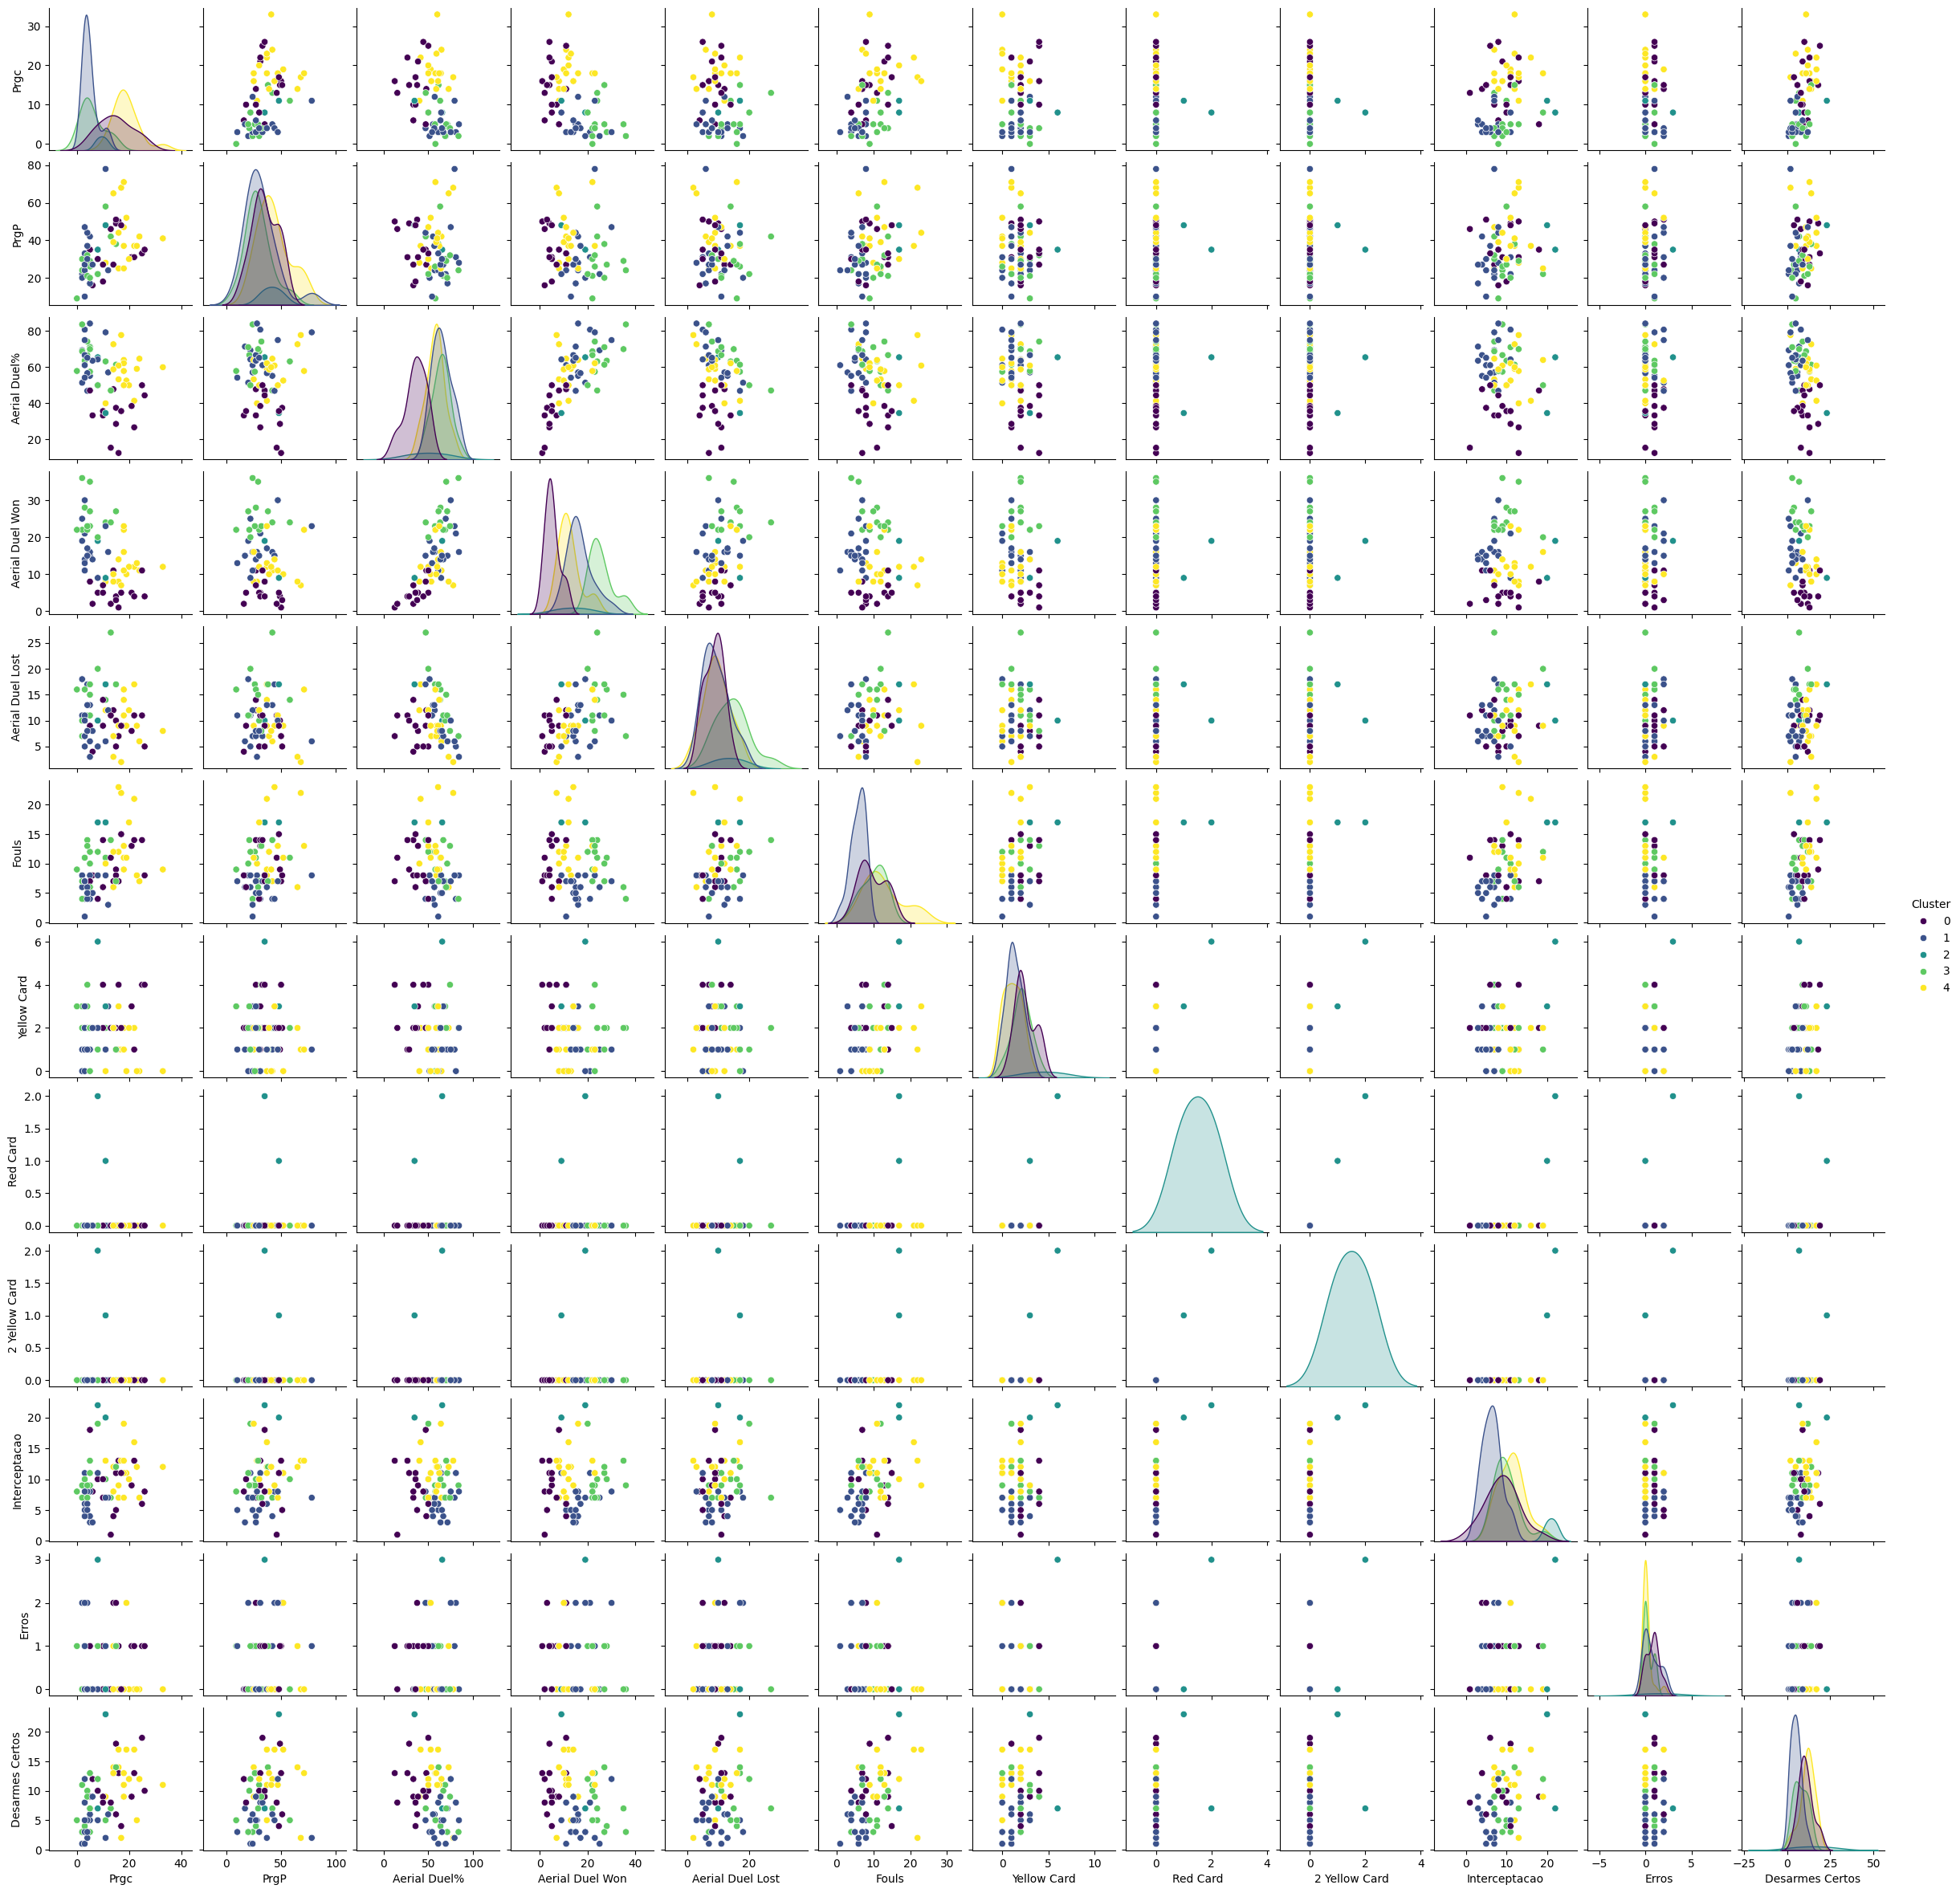

In [23]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Interceptacao','Erros','Desarmes Certos','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(Zag[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **Comportamento de Variáveis e Distribuição de Clusters para Zagueiros**

---

### **1. Análise de Correlações com Insights**

### 🧱 Correlações Fortes Positivas

- **Desarmes Certos ↔ Desarmes Totais**: `0.89`  
  🔁 Como esperado, quem realiza mais desarmes certos também tenta mais desarmes no total.

- **Desarmes Totais ↔ PrgC (Passes progressivos recebidos)**: `0.57`  
  📈 Indica que zagueiros mais participativos defensivamente também se posicionam melhor para receber passes.

- **Yellow Card ↔ Fouls / Red Card / 2 Yellow Card**: `~0.45`  
  ⚠️ Jogadores mais faltosos tendem a ser punidos com cartões, o que evidencia a agressividade do estilo de jogo.

- **Aerial Duel Won ↔ Aerial Duel%**: `0.69`  
  🎯 Vencer mais duelos no alto está diretamente ligado à eficiência nesses duelos.

---

### 📉 Correlações Fortes Negativas

- **Desarmes Totais ↔ Aerial Duel%**: `-0.47`  
  ❗ Zagueiros que dependem mais de desarmes no chão costumam ter menor eficiência no jogo aéreo.

- **Cluster ↔ Erros**: `-0.33`  
  🚨 Jogadores que cometem mais erros tendem a se agrupar em clusters de menor desempenho geral.

- **Cluster ↔ Interceptações**: `0.33`  
  📊 Cluster com maior média de interceptações tende a representar zagueiros mais bem posicionados.

---

### 🔍 Outras Correlações Relevantes

- **Minutos ↔ Cluster**: `0.29`  
  ⏱️ Jogadores com mais minutos geralmente estão em clusters mais relevantes (titulares consolidados).

- **PrgC ↔ PrgP**: `0.49`  
  🔄 Zagueiros que recebem passes progressivos também tendem a realizá-los, indicando envolvimento na construção ofensiva.

---

📌 **Conclusão:**  
O mapa de correlação mostra perfis distintos de zagueiros: alguns mais físicos e agressivos, outros mais técnicos e posicionais. Variáveis como **Desarmes**, **Duelos Aéreos** e **Cartões** ajudam a separar esses perfis claramente.
---

---

### **2. Perfis dos Clusters com Médias**

### 🟣 Cluster 0 (Roxo escuro)  
🧱 **Defensores físicos e dominantes no alto**  
- Altos valores em **Aerial Duel Won**, **Aerial Duel%** e **Minutos**  
- Alta presença em **PrgC** e **PrgP**, mostrando envolvimento na construção  
- Acima da média também em **Desarmes Totais** e **Interceptações**

💪 *Perfil de zagueiros completos*, com presença física e leitura tática. São líderes defensivos com boa contribuição na saída de bola.

---

### 🟡 Cluster 1 (Amarelo)  
⚔️ **Zagueiros de combate e imposição**  
- Destaques em **Desarmes Certos**, **Desarmes Totais** e **Interceptações**  
- Alto índice de **Faltas**, **Cartões Amarelos** e **Erros**  
- Participam bastante das ações defensivas e se expõem ao risco

🧨 *Perfil de zagueiros agressivos*, com estilo de marcação intensa. Podem comprometer disciplinarmente, mas são úteis contra atacantes velozes.

---

### 🔵 Cluster 2 (Azul escuro)  
🧤 **Zagueiros mais técnicos e com menos imposição física**  
- Baixa média em **Aerial Duel Won** e **Aerial Duel%**  
- Menores valores em **Desarmes** e **Interceptações**  
- Envolvimento moderado em **PrgP** e **PrgC**, com poucos erros

🎯 *Perfil de zagueiros técnicos*, que evitam o confronto direto. Contribuem mais com posicionamento e organização do jogo.

---

### 🟦 Cluster 3 (Ciano)  
⏳ **Baixa minutagem ou reservas**  
- Valores reduzidos em quase todos os indicadores  
- Baixa participação defensiva e ofensiva  
- Possivelmente reservas, lesionados ou em início de temporada

📉 *Grupo com pouco impacto na amostra*, exigindo mais contexto para avaliação adequada.

---

### 🟢 Cluster 4 (Verde)  
🔄 **Zagueiros regulares e equilibrados**  
- Números medianos em quase todas as métricas  
- Boa taxa de **Desarmes%** e poucos **Erros**  
- Discretos ofensivamente, mas confiáveis na marcação

⚙️ *Perfil de zagueiros de equilíbrio tático*, que executam bem suas funções sem se destacar excessivamente. Constantes e seguros.


In [30]:
cluster_names = {
    0: 'zagueiros completos',
    1: 'zagueiros agressivos',
    2: 'zagueiros tecnico',
    3: 'zagueiros sr',
    4: 'zagueiros regular'
}

# Adicionar nomes ao DataFrame
Zag['Perfil'] = Zag['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(Zag[['jogador','time','posicao', 'Minutos', 'Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros','Perfil']].head())

          jogador              time posicao  Minutos  Prgc  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros                Perfil
13  Júnior Alonso  Atlético Mineiro      DF      922    11    58          63.2               24                14     11            2         0              0                5               10       50.0             10      0          zagueiros sr
15         Lyanco  Atlético Mineiro      DF      718     8    35          65.5               19                10     17            6         2              2                7               11       63.6             22      3     zagueiros tecnico
16       Natanael  Atlético Mineiro      DF      803    11    28          40.0                8                12     10            0         0              0                9               17       52.9             13      0     zagueiros regular
28   Dav

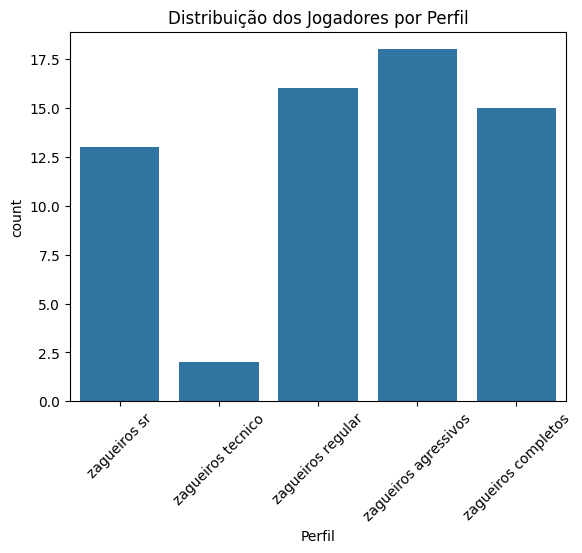

In [31]:
sns.countplot(data=Zag, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [32]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = Zag[Zag['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao', 'Minutos', 'Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "zagueiros completos"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: zagueiros completos
                jogador           time posicao  Minutos  Prgc  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros
34             Gilberto          Bahia      DF      716    14    27          47.8               11                12      7            2         0              0               13               20       65.0              4      2
85        Fabiano Souza          Ceará      DF      835    10    27          33.3                7                14     14            4         0              0                9               12       75.0              7      1
97        Matheus Bahia          Ceará      DF      619     6    16          33.3                2                 4      8            2         0              0               12               17       70.6              8      0
124         Matheuzinho    Corinthians    

In [33]:
# Dicionário dos peso para cada métrica
pesos = {
    'Prgc': 2,
    'PrgP': 2,
    'Aerial Duel Won': 10,
    'Fouls': -3,
    'Yellow Card': -5,
    'Red Card': -10,
    'Desarmes Certos': 10,
    'Interceptacao' : 5,
    'Erros' : -2

}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    Zag[coluna + '_Pontuacao'] = Zag[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
Zag['Pontuacao_Total'] = Zag[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = Zag['Pontuacao_Total'].min()
max_pontuacao = Zag['Pontuacao_Total'].max()
Zag['Pontuacao'] = (
    (Zag['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'zagueiros agressivos'
jogadores_filtrados = Zag[Zag['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: zagueiros agressivos
 Ranking          time posicao          jogador               Perfil  Pontuacao
       1 Vasco da Gama      DF      João Victor zagueiros agressivos  94.850949
       2      Flamengo      DF        Leo Ortiz zagueiros agressivos  68.292683
       3 Botafogo (RJ)      DF       Jair Paula zagueiros agressivos  58.807588
       4         Bahia      DF     David Duarte zagueiros agressivos  37.940379
       5      Flamengo      DF      Léo Pereira zagueiros agressivos  36.585366
       6    Fluminense      DF     Juan Freytes zagueiros agressivos  35.230352
       7      Cruzeiro      DF   Lucas Villalba zagueiros agressivos  33.333333
       8       Vitória      DF     Lucas Halter zagueiros agressivos  28.726287
       9   Corinthians      DF    André Ramalho zagueiros agressivos  27.642276
      10  Sport Recife      DF       João Silva zagueiros agressivos  26.829268
      11         Ceará      DF   Marllon Borges zagueiros agressiv

In [34]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'zagueiros agressivos'  # Defina o perfil desejado
jogadores_filtrados = Zag[Zag['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'zagueiros agressivos': ['David Duarte', 'Jair Paula', 'Marllon Borges', 'André Ramalho', 'Cacá', 'Lucas Villalba', 'Leo Ortiz', 'Léo Pereira', 'Juan Freytes', 'Thiago Silva', 'Vitão', 'Alan Ruschel', 'Guzmán Rodríguez', 'João Silva', 'Alan Franco', 'João Victor', 'Lucas Halter', 'Zé Marcos']
Digite o nome do jogador (ou 'sair' para finalizar): sair

Ranking de jogadores por eficiência de valor:
 Ranking          jogador  Valor de Mercado (€M)  Pontuacao  Custo por Ponto (€M)  Score de Valor
       1     David Duarte                    NaN  37.940379                  <NA>            <NA>
       2       Jair Paula                    NaN  58.807588                  <NA>            <NA>
       3   Marllon Borges                    NaN  24.661247                  <NA>            <NA>
       4    André Ramalho                    NaN  27.642276                  <NA>            <NA>
       5             Cacá                    NaN  20.596206                  <N


Jogadores selecionados: David Duarte, Leo Ortiz, Thiago Silva, João Victor, Alan Franco, João Victor
     Minutos  Prgc  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros
28       708     2    22          69.4               25                11      6            1         0              0                1                4       25.0              7      0
175      897    11    78          79.3               23                 6      8            1         0              0                2                3       66.7              7      1
210      630     3    24          61.1               11                 7      1            0         0              0                1                2       50.0              5      1
347      990     5    20          71.1               27                11     10            2         0              0                3                6  

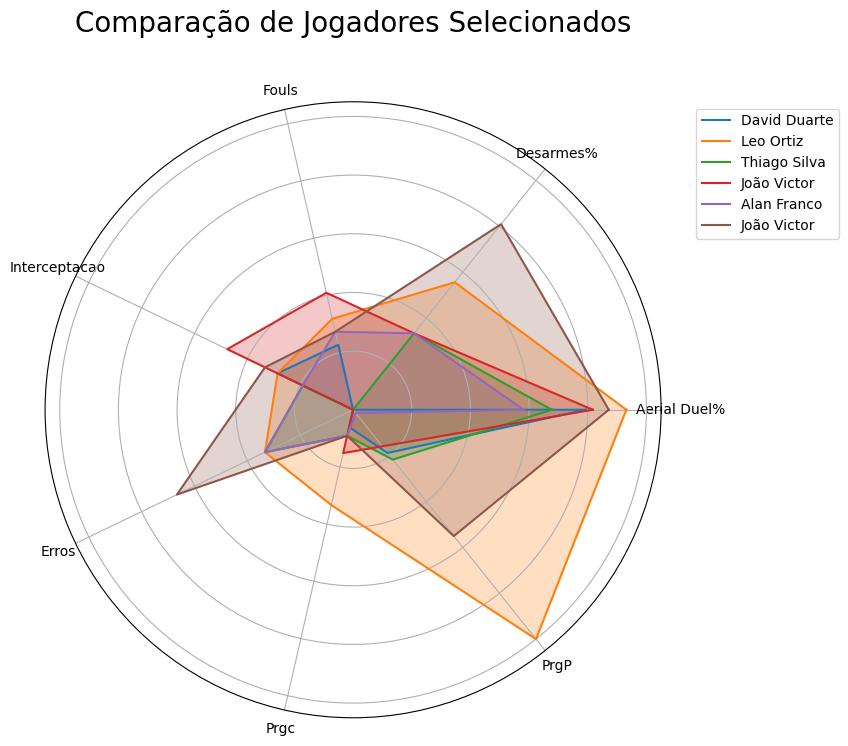

In [35]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['Minutos', 'Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros',]])

    # Definir as métricas a serem exibidas no radar
    metricas = ['Aerial Duel%', 'Desarmes%', 'Fouls', 'Interceptacao','Erros','Prgc', 'PrgP',]
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Thiago Silva', 'João Victor','David Duarte','Leo Ortiz','Alan Franco']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, Zag)